# Podstawowe algorytmy teorii grafów

In [5]:
#Imports:
import numpy as np

W poniższych przykładach grafowi:

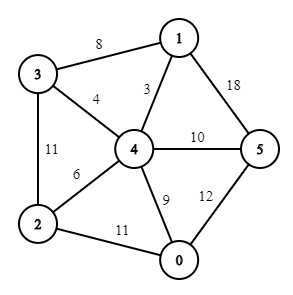

Odpowiada macierz:

In [6]:
M=[[np.inf,np.inf,  11  ,np.inf,   9  ,  12  ],
   [np.inf,np.inf,np.inf,   8  ,   3  ,  18  ],
   [  11  ,np.inf,np.inf,  11  ,   6  ,np.inf],
   [np.inf,   8  ,  11  ,np.inf,   4  ,np.inf],
   [   9  ,   3  ,   6  ,   4  ,np.inf,  10  ],
   [  12  ,  18  ,np.inf,np.inf,  10  ,np.inf]]

In [7]:
#Funkcjia do tworzenia losowych macierzy:
def make_matrix(n):
    array=np.floor(100*np.random.rand(n,n)+1)
    l=np.random.randint(1,n**2/4)
    k=np.random.randint(0,n,(l,2))
    for i in range(n):
        for j in range(i,n):
            if i==j:
                array[i][i]=np.inf
            else:
                array[i][j]=array[j][i]
    for col in k[:]:
        array[col[0]][col[1]]=np.inf
        array[col[1]][col[0]]=np.inf
    return array

# 1) Algorytm Dijkstry

Algorytm zachłanny, służący do znajdowania najkrótszej ścieżki z pojedyńczego źródła w grafie o nieujemnych wagach.

Schemat działania:

1.Stworzenie tablicy/słownika typu: {id:(dist,prev)} lub t[id]=dist

2.Dla id = węzłowi startowemu dist=0

3.Tworzymy kolejkę priorytetową wszystkich wieszchołków grafu

4.Dopóki kolejka nie jest pusta:

    a)Usuwamy wierzchołek najbliższy źródła
    
    b)Dla każdego sąsiada v wierzchołka dokonujemy relaksacji:
        d[u]+w(u,v)<d[v]

In [8]:
def dijstra(tab,s):
    nfo={}                          #{id:(dist,prev)}
    for i in range(len(tab)):
        nfo[i]=(np.inf,None)
    nfo[s]=(0,s)                    #{start:(0,start)}
    Q=set(np.arange(0,len(tab),1))  #węzły, których sąsiedzi nie zostali zbadani
    while Q:
        dist=np.inf                 #  Znajdowanie
        u=int(0)                    #   węzła
        for val in Q:               #  najbliższego
            if nfo[val][0]<dist:    #   względem
                u=int(val)          #   węzła
                dist=nfo[val][0]    #   startowego
        Q.remove(u)
        for v in range(len(tab)):
            if nfo[v][0]>nfo[u][0]+tab[u][v]:
                nfo[v]=(nfo[u][0]+tab[u][v],u)
    return nfo

In [12]:
dijstra(M,0)       #{id: (dist,prev)}

{0: (0, 0), 1: (12, 4), 2: (11, 0), 3: (13, 4), 4: (9, 0), 5: (12, 0)}

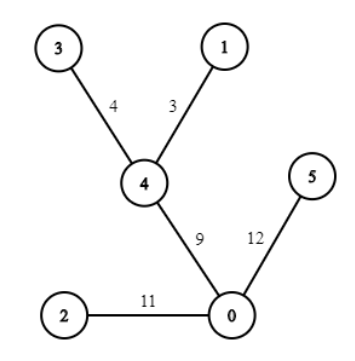